In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [361]:
df=pd.read_csv('titanic_dataset (2).csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [362]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [363]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# EDA

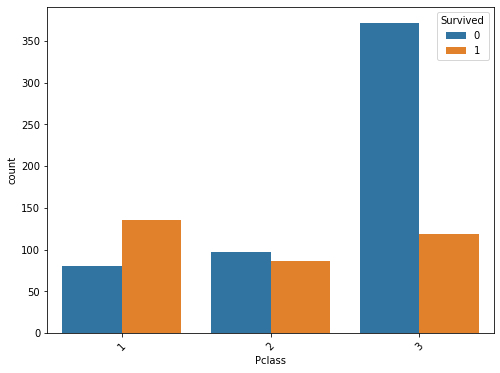

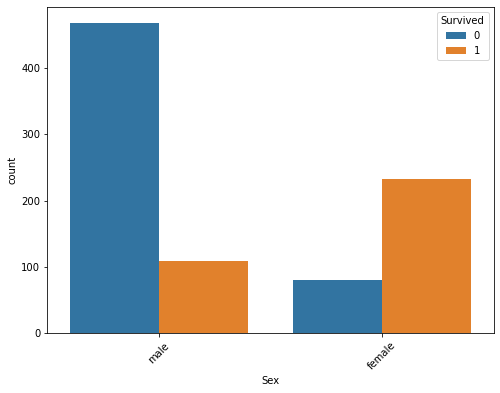

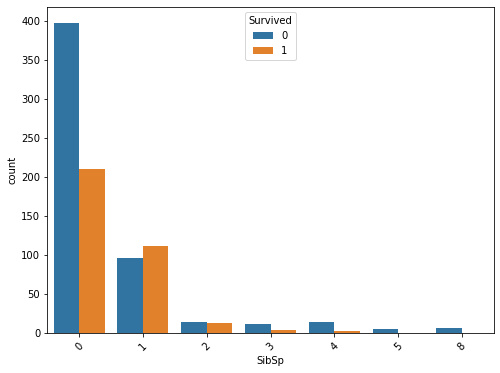

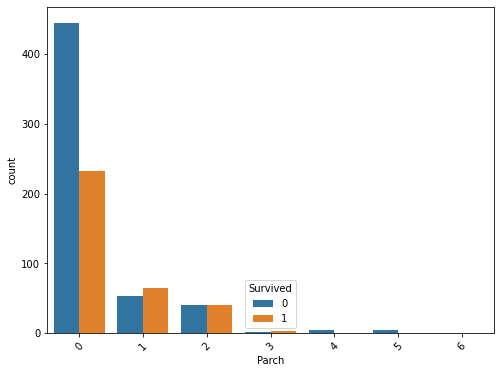

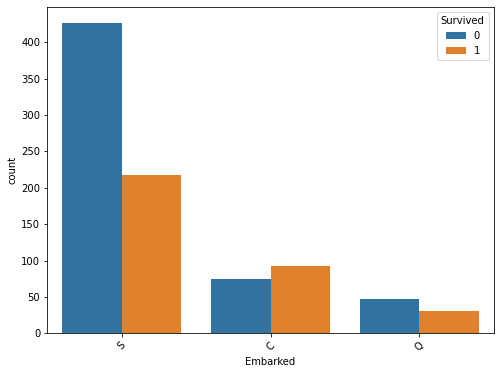

In [365]:
columns =["Pclass","Sex","SibSp","Parch","Embarked" ]

for feature in columns:
    plt.figure(figsize=(8,6))
    ax = sns.countplot(x=feature, data=df,hue=df["Survived"])
    plt.xticks(rotation=45)
    plt.show()

    Inference
    Third class has most number of passengers but first class has the most number of survivors
    Most of the passengers are males but most of the survivors are female
    Most of the survivors are single passengers
    Most of the survivors are  embarked from port s
    

# Filling Null values

In [366]:
(df. isnull(). sum() * 100 / len(df)).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [367]:
#since 77%data in cabin is null we are eliminating it

In [368]:
df=df.drop('Cabin',axis=1)

In [369]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

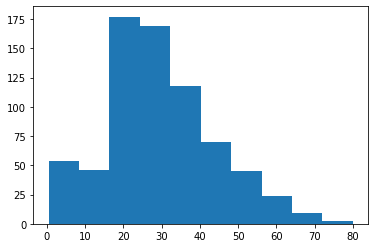

In [370]:
plt.hist(df['Age'])

In [371]:
#its right skewed so we can replace it with median

In [372]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [373]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [374]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Handling Outliers

In [375]:
numerical=[feature for feature in df.columns if df[feature].dtype!=object and feature not in ['Parch']]

In [376]:
df[numerical].columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Fare'], dtype='object')

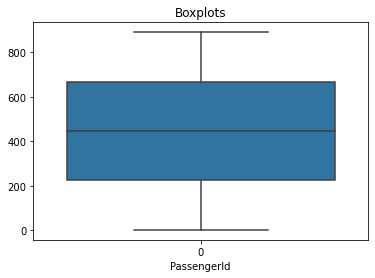

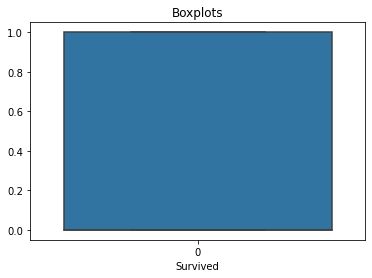

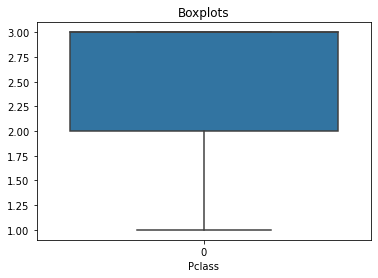

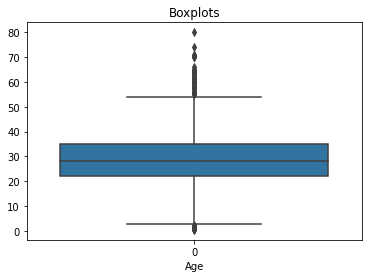

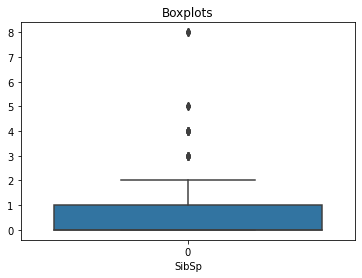

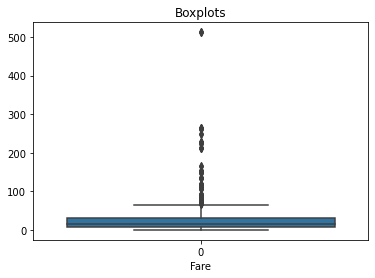

In [377]:
for feature in numerical :
    data=df.copy()
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df[feature])
    plt.title('Boxplots')
    plt.xlabel(feature)
    plt.show()


In [378]:
df[numerical].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [379]:
def remove_outliers(feature):
    Q1 = np.percentile(df[feature],25,interpolation = 'midpoint')
    Q2 = np.percentile(df[feature],50,interpolation = 'midpoint')
    Q3 = np.percentile(df[feature],75,interpolation = 'midpoint')

    IQR = Q3-Q1
    lr = Q1 - (1.5*IQR)
    ur = Q3 + (1.5*IQR)
    outlier = []
    for x in df[feature]:
        if ((x < lr) or (x > ur)):
            outlier.append(x)
    print(feature)
    print('No of outliers before:',len(outlier))
    
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])
    outlier = []
    for x in df[feature]:
        if ((x < lr) or (x > ur)):
            outlier.append(x)
    print('No of outliers after:',len(outlier))
    
for feature in numerical:
    out=remove_outliers(feature)
    

PassengerId
No of outliers before: 0
No of outliers after: 0
Survived
No of outliers before: 0
No of outliers after: 0
Pclass
No of outliers before: 0
No of outliers after: 0
Age
No of outliers before: 66
No of outliers after: 0
SibSp
No of outliers before: 46
No of outliers after: 0
Fare
No of outliers before: 116
No of outliers after: 0


In [380]:
#the outliers are removed

# Feature Engineering

    Sibsp is the number of siblings/spouses aboard.

    Parch is the number of parents/children aboard.

    Hence,We can combine SibSp and Parch into one feature called family size, which indicates the total number of family members on board for each member.

In [381]:
df['Family_Size']=df['SibSp']+df['Parch']+1

In [382]:
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [383]:
df['Title'] = df['Name'].apply(get_title)

In [384]:
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [385]:
# Group all non-common titles into one single grouping "Others"
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [386]:
df['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Others     23
Name: Title, dtype: int64

# Encoding

In [387]:
df['Sex'].replace(['male','female'],[0,1],inplace=True)
df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df['Title'].replace(['Mr','Miss','Mrs','Master','Others'],[0,1,2,3,4],inplace=True)

In [388]:
print ('Age of youngest passenger= ',df['Age'].min())
print ('Age of eldest passenger= ',df['Age'].max())

Age of youngest passenger=  2.5
Age of eldest passenger=  54.5


In [389]:
df['age_bin'] = pd.cut(x=df['Age'], bins=[0, 16, 36, 48,60], labels=['1', '2', '3','4'])

In [390]:
print ('Lowest Fare = ',df['Fare'].min())
print ('Highest Fare = ',df['Fare'].max())

Lowest Fare =  0.0
Highest Fare =  65.6344


In [391]:
df['Fare_bin'] = pd.cut(x=df['Age'], bins=[0, 14, 28, 42,70], labels=['1', '2', '3','4'])

In [392]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Title,age_bin,Fare_bin
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",0,22.0,1.0,0,A/5 21171,7.2500,0,2.0,0,2,2
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1.0,0,PC 17599,65.6344,1,2.0,2,3,3
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",1,26.0,0.0,0,STON/O2. 3101282,7.9250,0,1.0,1,2,2
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1.0,0,113803,53.1000,0,2.0,2,2,3
4,5.0,0.0,3.0,"Allen, Mr. William Henry",0,35.0,0.0,0,373450,8.0500,0,1.0,0,2,3


In [393]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Family_Size', 'Title',
       'age_bin', 'Fare_bin'],
      dtype='object')

In [394]:
df.drop(["Name","Age","Ticket","Fare","SibSp","Parch","PassengerId"],axis=1,inplace=True)

In [395]:
df.head()

,Survived,Pclass,Sex,Embarked,Family_Size,Title,age_bin,Fare_bin
0,0.0,3.0,0,0,2.0,0,2,2
1,1.0,1.0,1,1,2.0,2,3,3
2,1.0,3.0,1,0,1.0,1,2,2
3,1.0,1.0,1,0,2.0,2,2,3
4,0.0,3.0,0,0,1.0,0,2,3


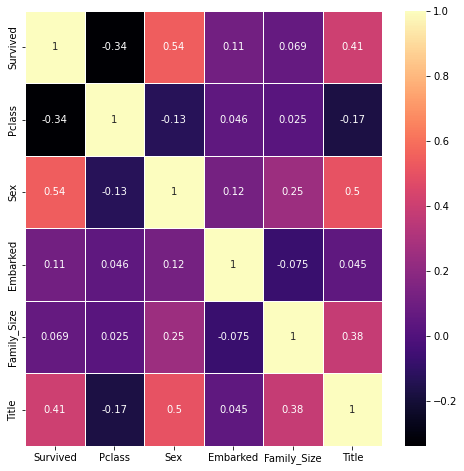

In [396]:
plt.figure(figsize=(8,8))
sns.heatmap(data=df.corr(), annot=True, linewidths=.5, cmap="magma")
plt.show()

There is no high correlation

In [398]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']

In [400]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [401]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [402]:
from sklearn.naive_bayes import GaussianNB 
GNB=GaussianNB()
GNB_model=GNB.fit(X_train , y_train)
pred=GNB_model.predict(X_test)
print('The accuracy of the NaiveBayes is',accuracy_score(pred,y_test))

The accuracy of the NaiveBayes is 0.7802690582959642


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [403]:
print("Confusion Matrix \n" ,confusion_matrix(pred,y_test))

Confusion Matrix 
 [[106  21]
 [ 28  68]]


# Hyperparameter Tuning

In [404]:
from pprint import pprint

GNB=GaussianNB()

print('Parameters currently in use:\n')
pprint(GNB.get_params())

Parameters currently in use:

{'priors': None, 'var_smoothing': 1e-09}


    These are the two parameters of Naive bayes classifier

In [405]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [406]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)


In [409]:
from sklearn.model_selection import GridSearchCV

In [410]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=GNB_model, param_grid=params_NB, cv=cv_method,verbose=1,scoring='accuracy')
Data_transformed = PowerTransformer().fit_transform(X_test)
gs_NB.fit(Data_transformed, y_test)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [411]:
gs_NB.best_params_

{'var_smoothing': 0.8111308307896871}

In [412]:
gs_NB.best_score_

0.788956228956229

In [415]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.7937219730941704
